# Project 1 - Group 5
----

# Victorian housing price and rental cost data from 2010 to 2020
----

## Data cleaning & Converting Raw Data to DataFrame

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Pricing data files
house_price_path = "resources/Housing_Price.csv"
rental_cost_path = "resources/Rental_Cost_Cleaned_v2.csv"

# Read the housing price data
house_price_df = pd.read_csv(house_price_path)
house_price_df.head()

,Locality 0,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,Abbotsford,"$736,000","$730,000","$714,000","$792,500","$862,500","$925,000","$1,187,500","$1,280,000","$1,192,500","$1,050,000","$1,205,000"
1,ABERFELDIE,Aberfeldie,"$1,046,500","$994,000","$852,500","$947,500","$1,045,000","$1,207,500","$1,300,000","$1,471,000","$1,500,000","$1,390,000","$1,620,000"
2,AIREYS INLET,Aireys Inlet,"$606,000","$680,000","$634,000","$664,000","$625,500","$680,000","$715,000","$737,500","$869,000","$985,000","$1,125,000"
3,AIRPORT WEST,Airport West,"$575,000","$557,500","$495,000","$532,000","$575,000","$635,000","$742,000","$845,000","$845,000","$795,000","$807,500"
4,ALBANVALE,Albanvale,"$320,000","$317,000","$310,000","$313,000","$328,000","$345,000","$439,000","$526,500","$546,000","$512,000","$540,000"


In [3]:
# Read the rental cost data
rental_cost_df = pd.read_csv(rental_cost_path)
rental_cost_df.head()

,Unnamed: 0,Locality,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Count 2020,Median 2020
0,NaN,locality,Count,Median,Count,Median,Count,Median,Count,Median,...,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median
1,Inner Melbourne,Albert Park-Middle Park-West St Kilda,958,$425,953,$425,977,$430,956,$440,...,852,$600,826,$585,802,$560,848,$550,832,$574
2,NaN,Armadale,592,$360,604,$360,624,$365,617,$370,...,753,$500,782,$500,709,$500,729,$495,743,$499
3,NaN,Carlton North,488,$423,485,$440,507,$450,515,$450,...,539,$585,536,$590,520,$590,547,$590,536,$589
4,NaN,Carlton-Parkville,"3,375",$340,"3,356",$340,"3,224",$340,"3,176",$340,...,"5,212",$404,"5,025",$400,"4,633",$400,"4,765",$395,4909,$400


In [4]:
#Delete extraneous column in house price ( 'Locality0' column)
del house_price_df["Locality 0"]
house_price_df.head()

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Abbotsford,"$736,000","$730,000","$714,000","$792,500","$862,500","$925,000","$1,187,500","$1,280,000","$1,192,500","$1,050,000","$1,205,000"
1,Aberfeldie,"$1,046,500","$994,000","$852,500","$947,500","$1,045,000","$1,207,500","$1,300,000","$1,471,000","$1,500,000","$1,390,000","$1,620,000"
2,Aireys Inlet,"$606,000","$680,000","$634,000","$664,000","$625,500","$680,000","$715,000","$737,500","$869,000","$985,000","$1,125,000"
3,Airport West,"$575,000","$557,500","$495,000","$532,000","$575,000","$635,000","$742,000","$845,000","$845,000","$795,000","$807,500"
4,Albanvale,"$320,000","$317,000","$310,000","$313,000","$328,000","$345,000","$439,000","$526,500","$546,000","$512,000","$540,000"


In [5]:
#Delete extraneous column in rental cost ( all 'unnamed'columns)
rental_cost_df=rental_cost_df.drop(rental_cost_df.columns[rental_cost_df.columns.str.contains('Unnamed',case=False)],axis=1)

#rental_cost_df=rental_cost_df.drop(rental_cost_df.index[0])
rental_cost_df=rental_cost_df.drop(labels=0,axis=0)

rental_cost_df.head()

,Locality,Count 2010,Median 2010,Count 2011,Median 2011,Count 2012,Median 2012,Count 2013,Median 2013,Count 2014,...,Count 2016,Median 2016,Count 2017,Median 2017,Count 2018,Median 2018,Count 2019,Median 2019,Count 2020,Median 2020
1,Albert Park-Middle Park-West St Kilda,961,$430,915,$445,973,$460,973,$462,1013,...,958,$515,896,$528,911,$563,876,$568,832,$574
2,Armadale,609,$364,643,$383,606,$385,628,$395,671,...,662,$403,781,$445,916,$486,768,$481,743,$499
3,Carlton North,499,$441,529,$465,488,$495,515,$493,539,...,532,$526,491,$545,507,$567,496,$579,536,$589
4,Carlton-Parkville,3283,$340,3412,$340,3835,$340,3832,$347,4275,...,5206,$373,4690,$398,4422,$417,4474,$432,4909,$400
5,CBD-St Kilda Rd,5735,$415,6140,$428,6459,$441,7428,$444,8665,...,10013,$453,10656,$480,10210,$494,10771,$505,11687,$471


In [6]:
#Split column on delimter -
#rental_cost_df=rental_cost_df['Locality'].str.split('-',expand=True)
#rental_cost_df.head()
#df1=house_price_df
#df2=rental_cost_df

rental_cost_df=rental_cost_df['Locality'].str.split('-', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'Locality'}).join(rental_cost_df.drop('Locality', axis=1))
rental_cost_df


,Locality,Count 2010,Median 2010,Count 2011,Median 2011,Count 2012,Median 2012,Count 2013,Median 2013,Count 2014,...,Count 2016,Median 2016,Count 2017,Median 2017,Count 2018,Median 2018,Count 2019,Median 2019,Count 2020,Median 2020
1,Albert Park,961,$430,915,$445,973,$460,973,$462,1013,...,958,$515,896,$528,911,$563,876,$568,832,$574
1,Middle Park,961,$430,915,$445,973,$460,973,$462,1013,...,958,$515,896,$528,911,$563,876,$568,832,$574
1,West St Kilda,961,$430,915,$445,973,$460,973,$462,1013,...,958,$515,896,$528,911,$563,876,$568,832,$574
2,Armadale,609,$364,643,$383,606,$385,628,$395,671,...,662,$403,781,$445,916,$486,768,$481,743,$499
3,Carlton North,499,$441,529,$465,488,$495,515,$493,539,...,532,$526,491,$545,507,$567,496,$579,536,$589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Mornington,1341,$343,1284,$365,1371,$374,1479,$385,1447,...,1354,$425,1329,$450,1267,$464,1243,$485,1244,$495
117,Mt Martha,1341,$343,1284,$365,1371,$374,1479,$385,1447,...,1354,$425,1329,$450,1267,$464,1243,$485,1244,$495
118,Seaford,1509,$287,1704,$305,1847,$310,1938,$317,1906,...,1666,$344,1760,$353,1779,$366,1822,$370,1637,$378
118,Carrum Downs,1509,$287,1704,$305,1847,$310,1938,$317,1906,...,1666,$344,1760,$353,1779,$366,1822,$370,1637,$378


In [7]:
#Filter House Price dataframe by Locality in Rental Cost dataframe
#df1=house_price_df
#df2=rental_cost_df

merge_df=pd.merge(house_price_df,rental_cost_df,on="Locality")
merge_df



,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2016,Median 2016,Count 2017,Median 2017,Count 2018,Median 2018,Count 2019,Median 2019,Count 2020,Median 2020
0,Abbotsford,"$736,000","$730,000","$714,000","$792,500","$862,500","$925,000","$1,187,500","$1,280,000","$1,192,500",...,2139,$448,1939,$458,1860,$479,1945,$495,2006,$483
1,Albert Park,"$1,167,500","$1,390,000","$1,265,000","$1,360,000","$1,503,000","$1,700,000","$1,775,000","$2,150,000","$2,070,000",...,958,$515,896,$528,911,$563,876,$568,832,$574
2,Alphington,"$1,000,000","$985,000","$1,000,000","$1,080,000","$1,029,000","$1,296,500","$1,272,500","$1,560,000","$1,720,000",...,703,$368,664,$383,703,$405,675,$444,648,$435
3,Altona,"$628,500","$575,000","$570,000","$575,000","$646,500","$718,000","$825,000","$950,000","$932,500",...,4587,$371,4955,$385,4914,$398,5215,$400,5125,$400
4,Armadale,"$1,800,000","$1,615,000","$1,500,000","$1,675,000","$1,750,000","$2,172,500","$2,367,500","$2,300,000","$2,341,500",...,662,$403,781,$445,916,$486,768,$481,743,$499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,West Melbourne,"$816,000","$885,000","$720,000","$905,000","$916,000","$1,005,000","$1,104,500","$1,350,000","$1,370,000",...,2749,$404,2838,$423,2776,$445,2762,$450,3402,$446
151,Whittlesea,"$345,000","$372,500","$365,000","$375,000","$375,000","$400,000","$448,500","$469,500","$577,500",...,1249,$345,1308,$355,1229,$373,1368,$383,1603,$390
152,Williamstown,"$884,000","$900,000","$901,000","$920,000","$970,000","$1,120,000","$1,282,500","$1,440,000","$1,415,000",...,585,$479,555,$485,571,$504,577,$519,520,$525
153,Windsor,"$900,000","$824,000","$818,000","$835,000","$956,500","$1,094,000","$1,505,000","$1,420,000","$1,422,500",...,2659,$399,2500,$414,2426,$434,2439,$444,2429,$445


In [8]:
merge_df.to_csv ('resources/Final_Clean V2.csv', encoding='utf-8',index = False, header=True)

## Data analysis

### Q1 - How the housing price and rental cost change over the last decade in Victoria
* Using 2 different types of chart to illustrate (line graph & area chart)

### Q2 - The top ten suburbs in Victoria for housing prices rises and rental cost increase over the last decade. 
* Which area had the highest increase in median house price and rental cost? 
* Using 2 different types of chart to illustrate (bar chart & scatter plot)

In [9]:
#parse price columns and calculate columns of differences

merge_df["h20"] = merge_df["2020"].replace("[$,]", "", regex=True).astype(float)
merge_df["h10"] = merge_df["2010"].replace("[$,]", "", regex=True).astype(float)

merge_df["h1020"] = merge_df.h20 - merge_df.h10

merge_df["r20"] = merge_df["Median 2020"].replace("[$,]", "", regex=True).astype(float)
merge_df["r10"] = merge_df["Median 2010"].replace("[$,]", "", regex=True).astype(float)

merge_df["r1020"] = merge_df.r20  - merge_df.r10


In [10]:
#
df = merge_df.sort_values(by="h1020", ascending=False).head(10)
df


,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2019,Median 2019,Count 2020,Median 2020,h20,h10,h1020,r20,r10,r1020
144,Toorak,"$2,590,000","$2,617,500","$2,775,000","$2,875,000","$3,391,000","$3,987,500","$4,900,000","$5,100,000","$4,700,000",...,751,$500,708,$525,5200000.0,2590000.0,2610000.0,525.0,400.0,125.0
64,Flinders,"$760,000","$822,000","$710,000","$765,000","$808,000","$839,000","$1,225,000","$1,525,000","$1,697,500",...,826,$388,794,$405,2085000.0,760000.0,1325000.0,405.0,276.0,129.0
17,Brighton,"$1,810,000","$1,730,000","$1,789,500","$1,802,500","$1,940,000","$2,302,500","$2,740,000","$3,050,000","$2,888,000",...,985,$651,871,$685,3065000.0,1810000.0,1255000.0,685.0,550.0,135.0
94,Middle Park,"$1,512,500","$1,345,000","$1,420,500","$1,587,500","$2,125,000","$2,317,000","$2,238,500","$2,370,000","$2,685,000",...,876,$568,832,$574,2652500.0,1512500.0,1140000.0,574.0,430.0,144.0
119,Portsea,"$1,387,500","$1,625,000","$1,398,000","$1,195,000","$1,305,000","$1,800,000","$1,701,000","$1,925,000","$2,180,000",...,1938,$381,1878,$393,2515000.0,1387500.0,1127500.0,393.0,269.0,124.0
76,Hawthorn,"$1,430,000","$1,330,000","$1,405,000","$1,575,000","$1,606,500","$1,916,500","$2,245,000","$2,650,000","$2,506,500",...,2157,$408,1945,$413,2492500.0,1430000.0,1062500.0,413.0,344.0,69.0
90,Malvern,"$1,741,500","$1,542,500","$1,550,000","$1,508,500","$1,946,000","$2,230,000","$2,328,500","$2,750,000","$2,661,000",...,496,$496,423,$475,2748000.0,1741500.0,1006500.0,475.0,393.0,82.0
97,Mont Albert,"$1,310,000","$1,310,000","$1,177,500","$1,316,000","$1,490,000","$1,863,000","$1,921,000","$2,100,000","$1,990,000",...,749,$513,731,$515,2200000.0,1310000.0,890000.0,515.0,408.0,107.0
26,Canterbury,"$1,827,500","$1,730,000","$1,790,000","$1,950,000","$2,100,000","$2,523,000","$2,620,000","$3,140,000","$2,536,500",...,749,$513,731,$515,2700000.0,1827500.0,872500.0,515.0,408.0,107.0
52,Elsternwick,"$1,240,000","$1,200,000","$1,155,000","$1,365,000","$1,315,000","$1,621,000","$1,723,500","$2,087,500","$1,970,000",...,662,$448,689,$448,2101500.0,1240000.0,861500.0,448.0,355.0,93.0


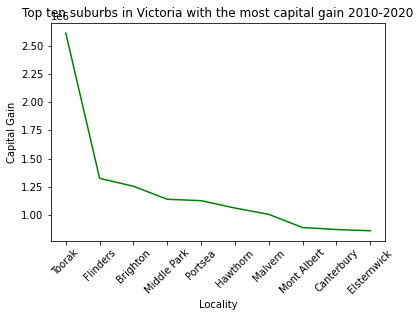

In [11]:
plt.title("Top ten suburbs in Victoria with the most capital gain 2010-2020")
plt.xlabel("Locality")
plt.ylabel("Capital Gain")
x_axis = df.Locality
tick_locations = [value for value in x_axis]

p10, = plt.plot(df.Locality, df.h1020, color="green", label="Capital Gain" )
plt.xticks(tick_locations, df.Locality, rotation="45")

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

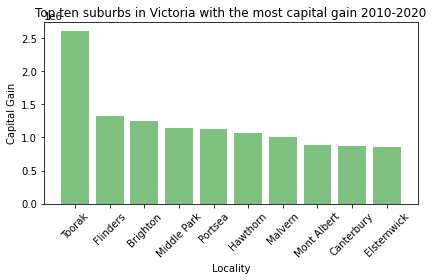

In [12]:
plt.title("Top ten suburbs in Victoria with the most capital gain 2010-2020")
plt.xlabel("Locality")
plt.ylabel("Capital Gain")

x_axis = df.Locality
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df.h1020, color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, df.Locality, rotation="45")
plt.tight_layout()


In [13]:
output_df = df[["Locality","h10","h20","h1020"]]

output_df.to_csv ('resources/topten_housing_price.csv', encoding='utf-8',index = False, header=True)


In [14]:
df = merge_df.sort_values(by="r1020", ascending=False).head(10)
df

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2019,Median 2019,Count 2020,Median 2020,h20,h10,h1020,r20,r10,r1020
18,Brighton East,"$1,255,000","$1,100,000","$1,075,000","$1,230,000","$1,300,000","$1,600,000","$1,750,000","$1,900,000","$1,890,000",...,427,$700,417,$737,1950000.0,1255000.0,695000.0,737.0,530.0,207.0
101,Mornington,"$512,000","$525,000","$501,500","$525,000","$558,000","$641,000","$745,000","$800,000","$850,000",...,1243,$485,1244,$495,890000.0,512000.0,378000.0,495.0,343.0,152.0
28,Carlton North,"$930,000","$833,000","$940,000","$890,500","$1,095,000","$1,177,500","$1,360,000","$1,628,000","$1,445,000",...,496,$579,536,$589,1500000.0,930000.0,570000.0,589.0,441.0,148.0
106,Newport,"$655,000","$680,000","$630,000","$695,000","$740,000","$825,000","$950,000","$1,080,000","$1,059,000",...,840,$488,778,$498,1100000.0,655000.0,445000.0,498.0,353.0,145.0
133,Spotswood,"$635,000","$602,500","$655,000","$680,000","$640,000","$795,000","$917,500","$1,027,500","$1,080,000",...,840,$488,778,$498,1000000.0,635000.0,365000.0,498.0,353.0,145.0
94,Middle Park,"$1,512,500","$1,345,000","$1,420,500","$1,587,500","$2,125,000","$2,317,000","$2,238,500","$2,370,000","$2,685,000",...,876,$568,832,$574,2652500.0,1512500.0,1140000.0,574.0,430.0,144.0
1,Albert Park,"$1,167,500","$1,390,000","$1,265,000","$1,360,000","$1,503,000","$1,700,000","$1,775,000","$2,150,000","$2,070,000",...,876,$568,832,$574,1890000.0,1167500.0,722500.0,574.0,430.0,144.0
130,Seddon,"$645,500","$620,500","$670,000","$675,000","$730,000","$830,000","$934,500","$982,500","$1,018,500",...,1269,$485,1266,$491,1100000.0,645500.0,454500.0,491.0,348.0,143.0
154,Yarraville,"$647,000","$607,000","$613,000","$696,000","$710,000","$810,000","$900,500","$1,000,000","$1,045,000",...,1269,$485,1266,$491,1038500.0,647000.0,391500.0,491.0,348.0,143.0
152,Williamstown,"$884,000","$900,000","$901,000","$920,000","$970,000","$1,120,000","$1,282,500","$1,440,000","$1,415,000",...,577,$519,520,$525,1370000.0,884000.0,486000.0,525.0,384.0,141.0


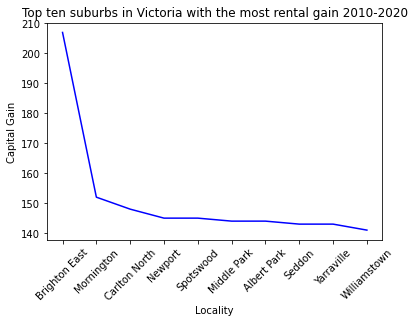

In [15]:
plt.title("Top ten suburbs in Victoria with the most rental gain 2010-2020")
plt.xlabel("Locality")
plt.ylabel("Capital Gain")
x_axis = df.Locality
tick_locations = [value for value in x_axis]

p10, = plt.plot(df.Locality, df.r1020, color="blue", label="Rental Gain" )
plt.xticks(tick_locations, df.Locality, rotation="45")

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

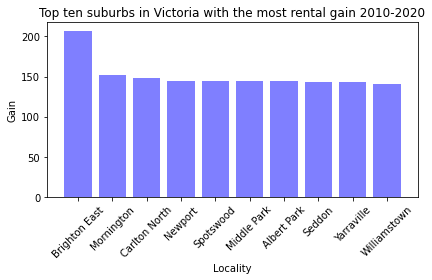

In [16]:
plt.title("Top ten suburbs in Victoria with the most rental gain 2010-2020")
plt.xlabel("Locality")
plt.ylabel("Gain")
#need to put value on top of the bar

x_axis = df.Locality
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df.r1020, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, df.Locality, rotation="45")
plt.tight_layout()

In [17]:
#save to csv and remove added columns
output_df = df[["r10","r20","r1020"]]
output_df.to_csv ('resources/topten_rental_cost.csv', encoding='utf-8',index = False, header=True)

### Q3 - The bottom ten suburbs in Victoria for housing prices fall and rental cost reduction over the last decade. 
* Which areas have been affected by median house price and rental cost in the last decade? 
* Using 2 different types of chart to illustrate (bar chart & scatter plot)

In [18]:
df = merge_df.sort_values(by="h1020", ascending=True).head(10)
df

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2019,Median 2019,Count 2020,Median 2020,h20,h10,h1020,r20,r10,r1020
92,Melton,"$250,000","$256,000","$250,000","$245,000","$240,000","$255,000","$280,500","$368,500","$415,000",...,2529,$340,2756,$346,390000.0,250000.0,140000.0,346.0,253.0,93.0
19,Broadmeadows,"$384,000","$357,000","$320,000","$325,000","$345,000","$370,000","$416,500","$546,000","$575,000",...,1731,$370,1610,$370,555000.0,384000.0,171000.0,370.0,303.0,67.0
145,Tullamarine,"$440,000","$420,000","$393,500","$395,000","$412,000","$472,500","$530,000","$655,000","$665,500",...,638,$386,650,$391,628000.0,440000.0,188000.0,391.0,300.0,91.0
113,Pakenham,"$335,000","$340,000","$335,000","$335,000","$350,000","$367,000","$400,000","$470,000","$520,000",...,2298,$353,2268,$354,526000.0,335000.0,191000.0,354.0,289.0,65.0
42,Cranbourne,"$327,000","$325,000","$313,000","$315,000","$331,500","$360,000","$406,000","$510,000","$540,000",...,4047,$386,4008,$390,520000.0,327000.0,193000.0,390.0,291.0,99.0
44,Dandenong,"$430,000","$400,500","$400,000","$405,000","$439,000","$485,000","$555,500","$619,000","$640,000",...,2129,$350,2091,$350,625000.0,430000.0,195000.0,350.0,269.0,81.0
56,Epping,"$380,000","$385,000","$365,000","$366,500","$386,500","$400,000","$455,000","$556,000","$600,000",...,2117,$371,2049,$379,576500.0,380000.0,196500.0,379.0,325.0,54.0
41,Craigieburn,"$365,000","$360,000","$350,000","$360,000","$362,000","$390,000","$425,000","$502,500","$547,000",...,2376,$385,2571,$390,567500.0,365000.0,202500.0,390.0,318.0,72.0
127,Roxburgh Park,"$371,000","$360,000","$355,000","$365,000","$385,000","$400,000","$435,000","$515,000","$546,000",...,1731,$370,1610,$370,574000.0,371000.0,203000.0,370.0,303.0,67.0
142,Thomastown,"$418,000","$400,000","$365,000","$390,000","$420,000","$436,000","$493,000","$653,000","$637,000",...,1130,$360,1133,$363,622000.0,418000.0,204000.0,363.0,295.0,68.0


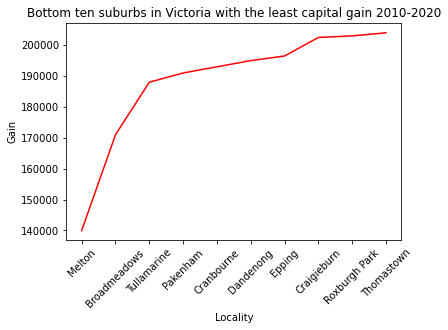

In [19]:
plt.title("Bottom ten suburbs in Victoria with the least capital gain 2010-2020")
plt.xlabel("Locality")
plt.ylabel("Gain")
x_axis = df.Locality
tick_locations = [value for value in x_axis]

p10, = plt.plot(df.Locality, df.h1020, color="red", label="Capital Gain" )
plt.xticks(tick_locations, df.Locality, rotation="45")

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

In [20]:
df = merge_df.sort_values(by="r1020", ascending=True).head(10)
df

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2019,Median 2019,Count 2020,Median 2020,h20,h10,h1020,r20,r10,r1020
131,South Melbourne,"$960,000","$925,000","$930,000","$1,030,000","$1,200,000","$1,310,000","$1,595,000","$1,532,500","$1,465,000",...,1118,$543,1061,$520,1580000.0,960000.0,620000.0,520.0,471.0,49.0
95,Mill Park,"$420,000","$410,000","$405,000","$408,000","$430,500","$480,000","$560,000","$668,500","$657,000",...,2117,$371,2049,$379,690000.0,420000.0,270000.0,379.0,325.0,54.0
56,Epping,"$380,000","$385,000","$365,000","$366,500","$386,500","$400,000","$455,000","$556,000","$600,000",...,2117,$371,2049,$379,576500.0,380000.0,196500.0,379.0,325.0,54.0
151,Whittlesea,"$345,000","$372,500","$365,000","$375,000","$375,000","$400,000","$448,500","$469,500","$577,500",...,1368,$383,1603,$390,610000.0,345000.0,265000.0,390.0,333.0,57.0
27,Carlton,"$900,000","$1,055,000","$860,500","$1,002,500","$1,020,000","$830,000","$1,050,000","$1,470,000","$1,600,000",...,4474,$432,4909,$400,1415000.0,900000.0,515000.0,400.0,340.0,60.0
115,Parkville,"$1,335,000","$1,100,000","$1,360,000","$1,200,000","$1,525,000","$1,360,500","$2,130,000","$2,375,000","$2,430,000",...,4474,$432,4909,$400,1725000.0,1335000.0,390000.0,400.0,340.0,60.0
84,Keilor,"$603,000","$570,000","$592,500","$572,500","$633,000","$703,000","$805,000","$845,000","$815,000",...,59,$435,57,$413,880000.0,603000.0,277000.0,413.0,350.0,63.0
13,Berwick,"$450,000","$440,000","$451,000","$453,000","$487,500","$535,000","$583,000","$670,000","$690,500",...,2187,$396,2013,$399,701500.0,450000.0,251500.0,399.0,334.0,65.0
113,Pakenham,"$335,000","$340,000","$335,000","$335,000","$350,000","$367,000","$400,000","$470,000","$520,000",...,2298,$353,2268,$354,526000.0,335000.0,191000.0,354.0,289.0,65.0
136,St Kilda,"$930,000","$860,000","$861,000","$892,000","$1,225,000","$1,164,000","$1,305,000","$1,551,000","$1,755,000",...,2862,$429,2897,$420,1296500.0,930000.0,366500.0,420.0,353.0,67.0


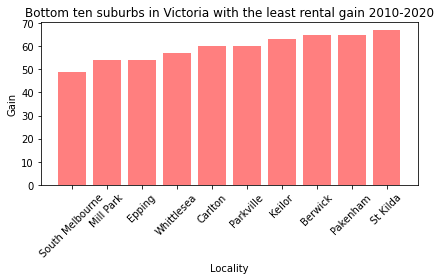

In [21]:
plt.title("Bottom ten suburbs in Victoria with the least rental gain 2010-2020")
plt.xlabel("Locality")
plt.ylabel("Gain")
#need to put value on top of the bar

x_axis = df.Locality
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df.r1020, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, df.Locality, rotation="45")
plt.tight_layout()

In [22]:
output_df = df[["Locality","h10","h20","h1020"]]

output_df.to_csv ('resources/bottomten_housing_price.csv', encoding='utf-8',index = False, header=True)


In [23]:
df = merge_df.sort_values(by="r1020", ascending=True).head(10)
df

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2019,Median 2019,Count 2020,Median 2020,h20,h10,h1020,r20,r10,r1020
131,South Melbourne,"$960,000","$925,000","$930,000","$1,030,000","$1,200,000","$1,310,000","$1,595,000","$1,532,500","$1,465,000",...,1118,$543,1061,$520,1580000.0,960000.0,620000.0,520.0,471.0,49.0
95,Mill Park,"$420,000","$410,000","$405,000","$408,000","$430,500","$480,000","$560,000","$668,500","$657,000",...,2117,$371,2049,$379,690000.0,420000.0,270000.0,379.0,325.0,54.0
56,Epping,"$380,000","$385,000","$365,000","$366,500","$386,500","$400,000","$455,000","$556,000","$600,000",...,2117,$371,2049,$379,576500.0,380000.0,196500.0,379.0,325.0,54.0
151,Whittlesea,"$345,000","$372,500","$365,000","$375,000","$375,000","$400,000","$448,500","$469,500","$577,500",...,1368,$383,1603,$390,610000.0,345000.0,265000.0,390.0,333.0,57.0
27,Carlton,"$900,000","$1,055,000","$860,500","$1,002,500","$1,020,000","$830,000","$1,050,000","$1,470,000","$1,600,000",...,4474,$432,4909,$400,1415000.0,900000.0,515000.0,400.0,340.0,60.0
115,Parkville,"$1,335,000","$1,100,000","$1,360,000","$1,200,000","$1,525,000","$1,360,500","$2,130,000","$2,375,000","$2,430,000",...,4474,$432,4909,$400,1725000.0,1335000.0,390000.0,400.0,340.0,60.0
84,Keilor,"$603,000","$570,000","$592,500","$572,500","$633,000","$703,000","$805,000","$845,000","$815,000",...,59,$435,57,$413,880000.0,603000.0,277000.0,413.0,350.0,63.0
13,Berwick,"$450,000","$440,000","$451,000","$453,000","$487,500","$535,000","$583,000","$670,000","$690,500",...,2187,$396,2013,$399,701500.0,450000.0,251500.0,399.0,334.0,65.0
113,Pakenham,"$335,000","$340,000","$335,000","$335,000","$350,000","$367,000","$400,000","$470,000","$520,000",...,2298,$353,2268,$354,526000.0,335000.0,191000.0,354.0,289.0,65.0
136,St Kilda,"$930,000","$860,000","$861,000","$892,000","$1,225,000","$1,164,000","$1,305,000","$1,551,000","$1,755,000",...,2862,$429,2897,$420,1296500.0,930000.0,366500.0,420.0,353.0,67.0


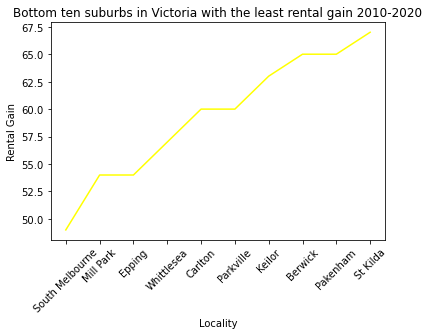

In [24]:
plt.title("Bottom ten suburbs in Victoria with the least rental gain 2010-2020")
plt.xlabel("Locality")
plt.ylabel("Rental Gain")
x_axis = df.Locality
tick_locations = [value for value in x_axis]

p10, = plt.plot(df.Locality, df.r1020, color="yellow", label="Rental Gain" )
plt.xticks(tick_locations, df.Locality, rotation="45")

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

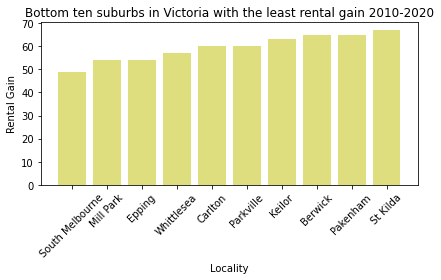

In [25]:
plt.title("Bottom ten suburbs in Victoria with the least rental gain 2010-2020")
plt.xlabel("Locality")
plt.ylabel("Rental Gain")
#need to put value on top of the bar

x_axis = df.Locality
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df.r1020, color='y', alpha=0.5, align="center")
plt.xticks(tick_locations, df.Locality, rotation="45")
plt.tight_layout()

In [26]:
output_df = df[["Locality","r10","r20","r1020"]]

output_df.to_csv ('resources/bottomten_rental_cost.csv', encoding='utf-8',index = False, header=True)


### Q4 - The suburbs had the highest and lowest number of leased properties. 
* Using the pie chart to illustrate (pie chart)

In [27]:
merge_df["c20"] = merge_df["Count 2020"].replace("[$,]", "", regex=True).astype(int)
merge_df["c10"] = merge_df["Count 2010"].replace("[$,]", "", regex=True).astype(int)

merge_df["c1020"] = merge_df.c20 - merge_df.c10
df = merge_df.sort_values(by="c1020", ascending=False)

In [28]:
topc = df.head(1)
topc

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Median 2020,h20,h10,h1020,r20,r10,r1020,c20,c10,c1020
79,Hoppers Crossing,"$327,500","$328,000","$312,500","$321,500","$340,000","$365,500","$415,000","$516,000","$552,000",...,$369,550000.0,327500.0,222500.0,369.0,278.0,91.0,7767,4387,3380


In [29]:
botc = df.tail(1)
botc

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Median 2020,h20,h10,h1020,r20,r10,r1020,c20,c10,c1020
75,Hastings,"$355,000","$350,000","$347,000","$345,000","$368,000","$365,000","$400,000","$507,500","$519,500",...,$405,562000.0,355000.0,207000.0,405.0,276.0,129.0,794,964,-170


### Q5 - The correlation between housing price/ rental cost and suburb distribution
* Is there a positive or negative relation between population (Count) with rental cost and housing price? (Linear Regression, Scatter Plot)

### Q6 - Creating the new 4 data frames (Eastern, Western, Northern and Southern suburb groups in Melbourne)  and compare the average housing price & average rental cost in each group over the time period (or year 2020 only) by using appropriate charts.

### Q7 – Producing heat map and markers with info box in regards to median housing price and rental cost from 2010 - 2020 for all areas in Victoria. 

In [30]:
import gmaps
# Import API key
from api_keys import g_key

data_file = "resources/locations.tsv"
location_csv = pd.read_csv(data_file, sep='\t')

In [31]:
location_df=pd.merge(merge_df,location_csv,on="Locality")

gmaps.configure(api_key=g_key)


info_box_template = """
<dl>
<dt>Suburb</dt><dd>{Locality}</dd>
<dt>2010 - Median Housing Price</dt><dd>{h10}</dd>
<dt>2020 - Median Housing Price</dt><dd>{h20}</dd>
<dt>Capital Gain</dt><dd>{h1020}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
locality_info = [info_box_template.format(**row) for index, row in location_df.iterrows()]
locations = location_df[["Lat", "Lng"]]

# Add marker layer ontop of heat map
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(location_df[["Lat", "Lng"]], weights=location_df.h1020, 
                                 dissipating=False,
                                 point_radius=0.03)


# Add layer
fig.add_layer(heat_layer)
marker_locations =[]

for index, row in location_df.iterrows():
  marker_locations.append((row["Lat"],row["Lng"]))

markers = gmaps.marker_layer(marker_locations,info_box_content=locality_info)
fig.add_layer(markers)
fig

# Display figure

Figure(layout=FigureLayout(height='420px'))

In [32]:
location_df=pd.merge(merge_df,location_csv,on="Locality")

gmaps.configure(api_key=g_key)


info_box_template = """
<dl>
<dt>Suburb</dt><dd>{Locality}</dd>
<dt>2010 - Rental Cost</dt><dd>{r10}</dd>
<dt>2020 - Rental Cost</dt><dd>{r20}</dd>
<dt>Rental Gain</dt><dd>{r1020}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
locality_info = [info_box_template.format(**row) for index, row in location_df.iterrows()]
locations = location_df[["Lat", "Lng"]]

# Add marker layer ontop of heat map
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(location_df[["Lat", "Lng"]], weights=location_df.r1020, 
                                 dissipating=False,
                                 point_radius=0.03)


# Add layer
fig.add_layer(heat_layer)
marker_locations =[]

for index, row in location_df.iterrows():
  marker_locations.append((row["Lat"],row["Lng"]))

markers = gmaps.marker_layer(marker_locations,info_box_content=locality_info)
fig.add_layer(markers)
fig

# Display figure

Figure(layout=FigureLayout(height='420px'))